Predicting Home Values with 2017 Zillow data

In [1]:
# Imports

import numpy as np
import pandas as pd
from scipy import stats
import sklearn.preprocessing as p
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import wrangle as w
import explore as e
import seaborn as sns
import acquire as a
import warnings
warnings.filterwarnings("ignore")
import env

%matplotlib inline
# %config InlineBackend.figure_format = 'svg'

# Acquire, Prepare, Split

I acquired the data from Codeup's SQL server then saved it locally in a csv file.  

Properties selected were filtered by having a transaction in 2017 and being a single family home.  Each row represents a home in one of the three counties studied (Los Angeles, Orange, Ventura).  

To prepare the data I created a function to rename columns, set upper and lower limits to remove outliers, converted data types and replaced the fips 4 digit code with the name of the county.

The data was then split into Train, Validate, and Test dataframes.

In [2]:
# This function combines the acquire, prepare and split functions into one
train, validate, test = w.wrangle_zillow()

# Explore

Some initial questions I asked were:

- Is county related to tax_value?
- Does total_sqft relate to tax_value?
- Does number of bedrooms relate to tax_value?
- Does number of bathrooms relate to tax_value?
- Does year_built relate to value?


#### 1) Is county related to tax_value?

<AxesSubplot:xlabel='county', ylabel='tax_value'>

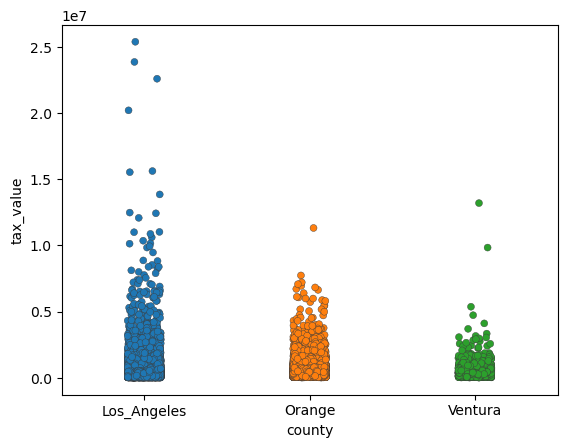

In [3]:
e.county_stripplot()

Majority of homes clumped in similar price range wit Los Angeles County have a few above the rest.

Does that make a difference in price?

Ho = County is not related to value

Ha = County is related to value

In [4]:
#first getting dummies for the three counties to test individually
train_encoded = e.county_dummies(train)

Los Angeles County

In [5]:
# LA County t-test

target_sample = train[train.county == 'Los_Angeles'].mean()
overall_mean = train.tax_value.mean()
e.one_sample_ttest(target_sample, overall_mean, alpha=0.05)


(0.8356007786496701, 0.2154867481676862, 0.05)

Orange County

In [6]:
# Orange County t-test

target_sample_Orange = train[train.county == 'Orange'].mean()

e.one_sample_ttest(target_sample_Orange, overall_mean, alpha=0.05)

(0.8714096732651069, 0.20620866170363233, 0.05)

Ventura County

In [7]:
# Ventura County t-test
target_sample_Ventura = train[train.county == 'Ventura'].mean()

e.one_sample_ttest(target_sample_Ventura, overall_mean, alpha=0.05)


(0.8888265046930064, 0.20180211473865908, 0.05)

In all three tests we fail to reject the null hypothesis.  Convential wisdom says that real estate is all about location, location, location.  So how can the tests show no relationship?

This is likely due to a small sample size.  If we were to compare these three counties to all counties in California there would be a strong positive correlation.  In this test though, we are only looking at 3 neighboring counties in the same metropolitan area.  For this reason I will still include this feature in my model.

#### 2) Does total_sqft relate to tax_value?


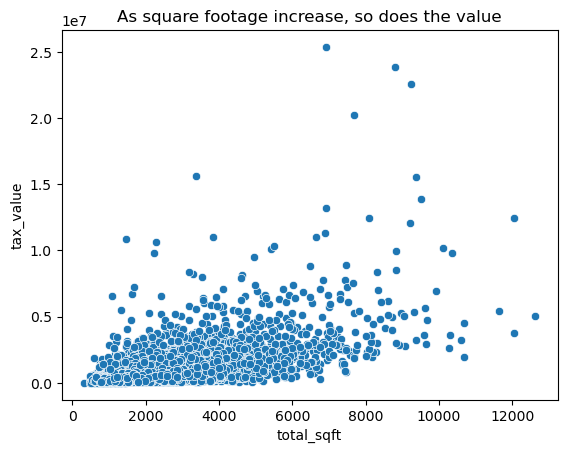

In [8]:
e.scatter_plot_sqft_()

Ho = square feet is not related to tax_value

Ha = square feet is related to tax_value

In [9]:
#Pearson R test
e.pearson_r(train.total_sqft, train.tax_value)

0.5928012742210308

This test confirms what is shown in the chart.  There is a positive correlation with square feet and value.

#### 3) Does number of bedrooms relate to tax_value?


<AxesSubplot:xlabel='bedrooms', ylabel='tax_value'>

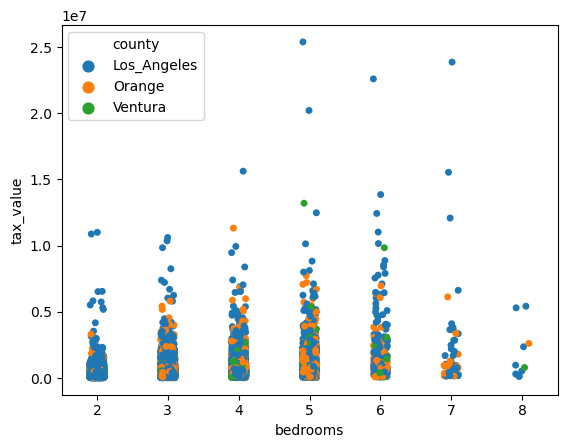

In [10]:
e.bedrooms_stripplot()

#### 4) Does number of bathrooms relate to tax_value?


<AxesSubplot:xlabel='bathrooms', ylabel='tax_value'>

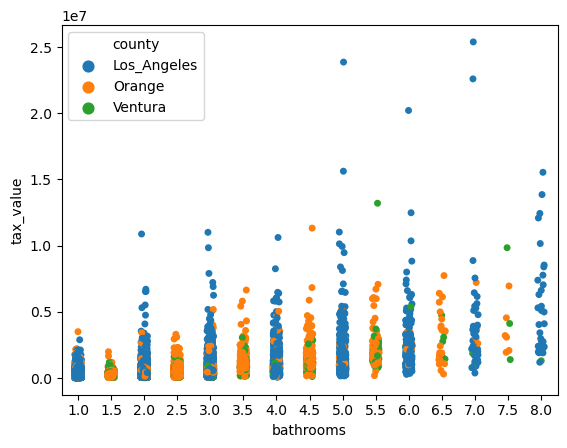

In [11]:
e.bathrooms_stripplot()

Ho = Number of bathrooms does not positively correlate with tax_value

Ha = Number of bathrooms does positibely correlate with tax_value

In [14]:
# Bathrooms t-test
e.t_test_two_tailed(train.bathrooms, train.tax_value, alpha=0.05)

Reject the null hypothesis


(-125.74697802695749, 0.0)

#### 5) Does year_built relate to tax_value?

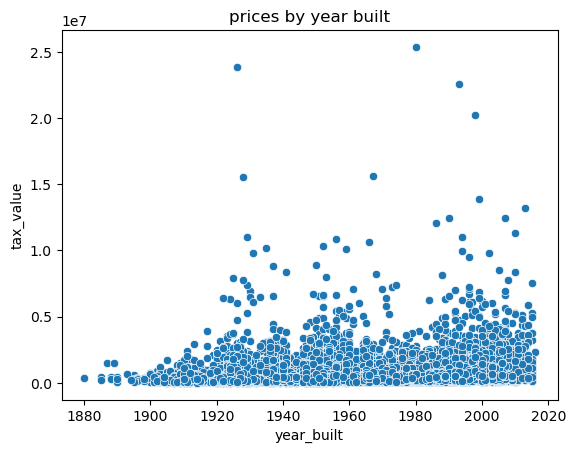

In [16]:
e.scatter_plot(train, 'year_built' , 'tax_value' , 'prices by year built')

Ho = year built is not related to value 

Ha = year built is related to value

In [17]:
#Pearson R test
e.pearson_r(train.year_built, train.tax_value)

0.17618854913802076

There is a weak positive correlation.

Older homes tend to have less square footage than modern homes.  As we've seen already, more square footage = more money.

A home being old can certainly add to its value, especially if its in a designated historic distrinct, but age alone does not drive price.  It must be well-kept or renovated.